In [66]:
import numpy as np
import cvxpy as cp
import random
import pandas as pd


In [67]:
n = 10000    # number of bidders
m = 10       # type of resources

A = pd.read_csv("A.csv")
pi = pd.read_csv("pi_2.csv")

A = np.array(A)
pi = np.array(pi)
pi = pi.T
b = np.array([1000 for _ in range(m)])  

In [68]:
x = cp.Variable(n)
ee = np.ones(n)
objective = cp.Maximize(pi@x)
constraints = [A@x <= b, x >= 0, x <= ee]
prob = cp.Problem(objective, constraints)
prob.solve()
opv1 = prob.value

In [69]:
def u(s,w):
    value = 0
    for i in range(m):
        value += w/m * cp.log(s[i])
    return value

In [70]:
def dynamicLearning(start, k, xp, xk, w):
	A1 = A[:m, :k]
	pi1 = pi[:,:k]
	x = cp.Variable(k)
	s = cp.Variable(m)
	# print(x.shape)
	obj = cp.Maximize(pi1@x + u(s,w))
	cons = [A1@x + s <= k/n * b, x>=0, x<=1]
	prob = cp.Problem(obj, cons)
	prob.solve(solver="SCS")
	P = prob.constraints[0].dual_value
	# print(P)
	AT = A.T

	xpNow = xp
	xkNow = xk
	for i in range(start, 2*k):
		if i >= n:
			# print(xkNow)
			global xTrue
			xTrue = xkNow
			return xkNow
		
		cri = (AT[i].dot(P))
		if(pi[0][i] > cri):
			xpNow.append(1)
		else:
			xpNow.append(0)

		test = 1
		for j in range(m):
			temp1 = A[j,i]*xpNow[i]
			temp2 = b[j] - (A[j:j+1, :i]).dot(np.array(xkNow))
			# print(i)
			# print(len(xkNow))
			if temp1 > temp2:
				test = 0
				break
		if test == 1:
			xkNow.append(xpNow[i])
		else:
			xkNow.append(0)

	dynamicLearning(2*k, 2*k, xpNow, xkNow, w)
	return xTrue
		

In [71]:

for i in range(1,50):
    w = i
    xk = [0]*50
    xp = [0]*50
    l_decision = np.array(dynamicLearning(50, 50, xp, xk, w))
    opv2 = (np.dot(pi,l_decision)[0])
    print("when w =", w)
    print("the competetive ratio is", opv2/opv1)

when w = 1
the competetive ratio is 0.978601456837532
when w = 2
the competetive ratio is 0.9782351605652236
when w = 3
the competetive ratio is 0.9783264725544019
when w = 4
the competetive ratio is 0.9777789615658169
when w = 5
the competetive ratio is 0.9782048763772149
when w = 6
the competetive ratio is 0.9778269529973068
when w = 7
the competetive ratio is 0.9779359523875596
when w = 8
the competetive ratio is 0.9780411875586937
when w = 9
the competetive ratio is 0.9780147928364383
when w = 10
the competetive ratio is 0.978833635415891
when w = 11
the competetive ratio is 0.9788856729038952
when w = 12
the competetive ratio is 0.9796775096986613
when w = 13
the competetive ratio is 0.9796020061908668
when w = 14
the competetive ratio is 0.9805342841342056
when w = 15
the competetive ratio is 0.9805787033152006
when w = 16
the competetive ratio is 0.981413721956705
when w = 17
the competetive ratio is 0.9816809764912773
when w = 18
the competetive ratio is 0.9813585028959266
when

In [13]:
y_1 = [0.978601456837532,
 0.9782351605652236,
 0.9783264725544019,
 0.9777789615658169,
 0.9782048763772149,
 0.9778269529973068,
 0.9779359523875596,
 0.9780411875586937,
 0.9780147928364383,
 0.978833635415891,
 0.9788856729038952,
 0.9796775096986613,
 0.9796020061908668,
 0.9805342841342056,
 0.9805787033152006,
 0.981413721956705,
 0.9816809764912773,
 0.9813585028959266,
 0.9815234764232756,
 0.9817959456778435,
 0.9821996883111532,
 0.9829193574505736,
 0.9830834755193283,
 0.9830834755193283,
 0.9838644357656147,
 0.9836923015883576,
 0.9834354817333477,
 0.9837522963441231,
 0.9831613695273153,
 0.9828269307268809,
 0.9830694572919004,
 0.9826200684399192,
 0.9819875922995811,
 0.9817311625140643,
 0.9817311625140643,
 0.9812160516517386,
 0.9812930140432777,
 0.9803413699664802,
 0.9802513827213764,
 0.9797559061145966]

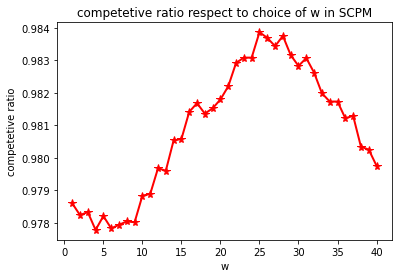

In [18]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(y_1))]
plt.plot(x, y_1, color='red', marker='*', linestyle='solid', linewidth=2, markersize=8)
plt.xlabel("w")
plt.ylabel("competetive ratio")
plt.title("competetive ratio respect to choice of w in SCPM")
plt.savefig("Q5_different_w.jpg", dpi=400)
plt.show()
# plt.savefig("Q5_different_2.png")

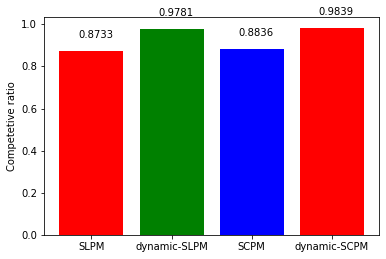

In [19]:
import matplotlib.pyplot as plt
r_1 = 0.8732767505468298
r_2 = 0.9781035169736172
r_4 = 0.8835887152136601
r_5 = 0.9838644357656147
y = [r_1, r_2, r_4, r_5]
x = ['SLPM', 'dynamic-SLPM','SCPM',  'dynamic-SCPM']
plt.bar(x, y, color=['r','g','b'])
x_1 = [0,1,2,3]
for i,j in zip(x_1,y):
    plt.text(i+0.05,j+0.05,'%.4f' %j, ha='center',va='bottom')
# plt.title("competetive ratios of dynamic learning in SLPM and SCPM")
plt.ylabel("Competetive ratio")
plt.savefig('Q_12_45.jpg')
plt.show()

